** **
### Data Analysis
** **

In [1]:
#importing key packages
import pandas as pd
import numpy as np

In [2]:
#READing data
housing = pd.read_csv("datasets/housing.csv")

In [3]:
#Quick description of the data
housing.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
#Quick summary of the data
housing.describe(include="all")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [5]:
#Plotly package to plot charts
import plotly
import cufflinks as cf
import plotly.plotly as py
import plotly.graph_objs as go

plotly.tools.set_credentials_file(username="mauricioreys", api_key="huRcoJViJnbB5v2vIbDG")
cf.set_config_file(offline=False, world_readable=True, theme='white')

In [6]:
#Plotting data distribution for numeric variables
housing.iloc[:,:10].iplot(kind='histogram', subplots=True, shape=(5, 2), filename='cufflinks/multiple-histograms')

In [7]:
#Splitting the data into train and test sets
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=2)

In [8]:
#Creating a sudo variable to use stratified sampling
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [9]:
#Making stratified data split
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=2)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [10]:
#Distribution for income category in test set
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [11]:
#Distribution for income category in training set
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [12]:
#Removing income category variable out of dataset
for set_ in (strat_test_set, strat_train_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [13]:
#Scatter plot with plotly
strat_train_set.iplot(kind='scatter', mode='markers', x='longitude', y='latitude', filename='cufflinks/simple-scatter')

In [14]:
#Downloading matplotlib to better visualize geo data
import matplotlib.pyplot as plt

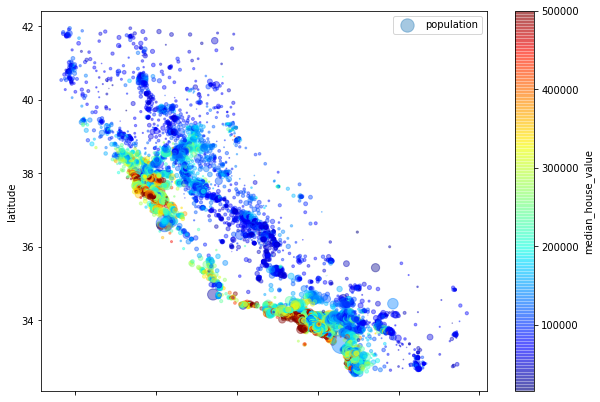

In [15]:
#Plot to visualize high media income concentration in different parts of LA, US
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=[10,7],
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [16]:
#Looking for correlations
housing_corr = strat_test_set.corr()
housing_corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.693599
housing_median_age    0.135083
total_rooms           0.109415
households            0.037731
total_bedrooms        0.024608
longitude            -0.049845
population           -0.056335
latitude             -0.137161
Name: median_house_value, dtype: float64

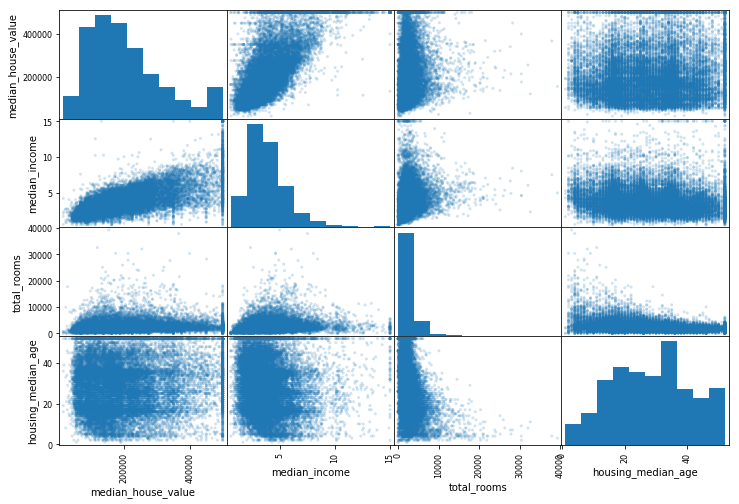

In [17]:
#Looking more extensively to correlations
from pandas.plotting import scatter_matrix

attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize=[12,8], alpha=0.2);

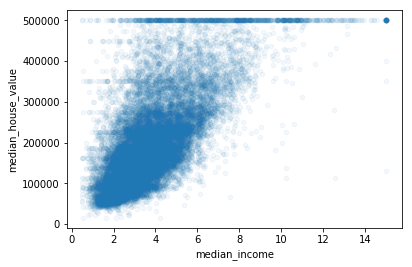

In [18]:
#Taking a closer look at median income Vs. median house value
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.05);

** **
### Machine Learning
** **

In [19]:
#Making a copy of the dataset
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [20]:
#Data Cleaning
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

/Users/maurey/python/ml/code/ml_applications/machine_learning_projects/scikit-learn/sklearn/utils/deprecation.py:58: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.



In [21]:
#Median can only be calculated on num values
housing_num = housing.drop("ocean_proximity", axis=1)

In [22]:
#Calculating the median for each num attribute
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [23]:
#Stats
imputer.statistics_

array([-118.52  ,   34.26  ,   29.    , 2123.    ,  434.    , 1166.    ,
        408.5   ,    3.5377])

In [24]:
#Creating X values
X = imputer.transform(housing_num)

In [25]:
#Creating X variables dataframe
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [26]:
#Integrating "ocean view" attribute left out earlier
housing_cat = housing["ocean_proximity"]

In [27]:
#One hot encoding ocean proximity attribute
from sklearn.preprocessing import OrdinalEncoder

cat_encoder = OrdinalEncoder()
housing_cat_reshaped = housing_cat.values.reshape(-1,1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)

In [28]:
#Custom transformer
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [29]:
#Transformation pipelines - useful when there are many steps in the machine learning process to tune data for prediction
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", Imputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())])

/Users/maurey/python/ml/code/ml_applications/machine_learning_projects/scikit-learn/sklearn/utils/deprecation.py:58: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.



In [30]:
#Applying pipeline to dataset

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [31]:
#Feeding pandas dataframe containing non-numerical cols
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

** **
### Making a whole pipeline process
** **

In [32]:
#Creating pipelines for numerical and categorical data

num_attributes = list(housing_num)
cat_attributes = ["ocean_proximity"]

num_pipeline = Pipeline([
    ("selector", DataFrameSelector(num_attributes)),
    ("imputer", Imputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler()),
])

cat_pipeline = Pipeline([
    ("selector", DataFrameSelector(cat_attributes)),
    ("cat_encoder", OrdinalEncoder()),
])


/Users/maurey/python/ml/code/ml_applications/machine_learning_projects/scikit-learn/sklearn/utils/deprecation.py:58: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.



In [33]:
#Union of num and cat pipelines
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

In [34]:
#Data ready for modelling
housing_ready = full_pipeline.fit_transform(housing)

In [35]:
len(housing_ready)

16512

In [36]:
#Training the model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_ready, housing_labels)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
#Verifying the model
from sklearn.metrics import mean_squared_error

housing_preds = lin_reg.predict(housing_ready)
lin_mse = mean_squared_error(housing_labels, housing_preds)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

69104.93102149345

In [38]:
#Trying with a Decision Tree regressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_ready, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [39]:
#Verifying DT model
housing_tree_preds = tree_reg.predict(housing_ready)
tree_mse = mean_squared_error(housing_labels, housing_tree_preds)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [40]:
#Using cross validation to better understand the validity of Decission trees
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_ready, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scores)

In [41]:
#Function to display scores out of CV
def display_scores(scores):
    print("Scores: ",scores)
    print("Mean: ",scores.mean())
    print("std :",scores.std())

display_scores(tree_rmse_scores)

Scores:  [72549.26953518 71841.53967869 70722.04299084 70234.72959717
 75596.77184537 72717.81973666 73440.7228149  73849.56242542
 73880.52169908 71951.28517833]
Mean:  72678.42655016347
std : 1515.2843244700928


In [42]:
#Computing scores for linear regression
lin_scores = cross_val_score(lin_reg, housing_ready, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [64962.45041269 68861.1919597  67693.11856857 67024.99510414
 72095.73088201 70115.46354503 75363.93912571 67542.09726901
 72020.60641389 69372.19464868]
Mean:  69505.17879294306
std : 2865.1911589840306


In [43]:
#Changing model
from sklearn.ensemble import RandomForestRegressor

forrest_reg = RandomForestRegressor()
forrest_reg.fit(housing_ready, housing_labels)

/Users/maurey/python/ml/code/ml_applications/machine_learning_projects/scikit-learn/sklearn/ensemble/forest.py:248: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [44]:
#Verifying RF model
housing_random_preds = forrest_reg.predict(housing_ready)
forrest_mse = mean_squared_error(housing_labels, housing_random_preds)
forrest_rmse = np.sqrt(forrest_mse)
forrest_rmse

22419.218830046382

In [45]:
#Using cross validation to better understand the validity of Random forrest
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forrest_reg, housing_ready, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)

random_rmse_scores = np.sqrt(-scores)

In [46]:
#Function to display scores out of CV

display_scores(random_rmse_scores)

Scores:  [52479.59092777 52987.05309372 51054.57783611 50827.44759626
 55118.99339906 52622.37411438 57560.23345252 53478.89099193
 53891.32562597 53049.31216852]
Mean:  53306.97992062299
std : 1851.7011360052697


** **
### Fine tune the model
** **

In [ ]:
#Grid search to find the best model parameters
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')

grid_search.fit(housing_ready, housing_labels)

In [ ]:
#Display best parameters
grid_search.best_params_

In [ ]:
#Display best estimator
grid_search.estimator

In [ ]:
#Finding best parameters using cross validation
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
#Best attribute on RF model
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

In [ ]:
#Mapping feature importances to real names
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attributes + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)